<div id="container" style="position:relative;">
<div style="float:left"><h1> Scaling and Distances </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Distances

With both the linear regression and logistic regression models we've seen so far, we have tried to answer a simple question: If a given feature increases by some amount $\Delta x$ then how will a given target increase?

For a linear regression, the coefficients tell us that if a certain feature increases by 1, our response $y$ will increase by $\beta_i$, where $\beta_i$ is the coefficient for feature $i$.

For a logistic regression, the coefficients tell us that if a certain feature increases by 1, our odds of seeing the response as 1 vs 0 increase by a factor of $e^{\beta_i}$.

Both methods use some linear function to determine either the response for a regression problem, or the odds of a response for a classification problem. However, models we will explore in the future employ the notion of distance between points to perform both regression and classification. Therefore, we need to be familiar with certain definitions around the notion of distance.

### Data Points as Points in Space

Let's look at the loans dataset again. You can download the data [here](https://drive.google.com/open?id=1aKVuOX9UB3arbycymUG3HmcbKJHignyG).

In [2]:
loans_df = pd.read_csv('data/loans.csv').iloc[:, 1:]
loans_df.head()

,Credit Score,Loan Request Amount,Approval
0,548,56,0
1,625,168,0
2,899,237,1
3,608,84,0
4,783,34,1


Every data point has two features, or attributes, inside it: the credit score, and the loan request amount. We can imagine these points as living in a two dimensional space. We will refrain from calling this space as composed of an $x$ and $y$ axis, since $y$ is usually the dependent variable. 

Instead, we will call our first axis $x_1$ and the second $x_2$. So in our case, $x_1$ is credit score, and $x_2$ is loan request amount.

We can employ `matplotlib` to plot the points in space.

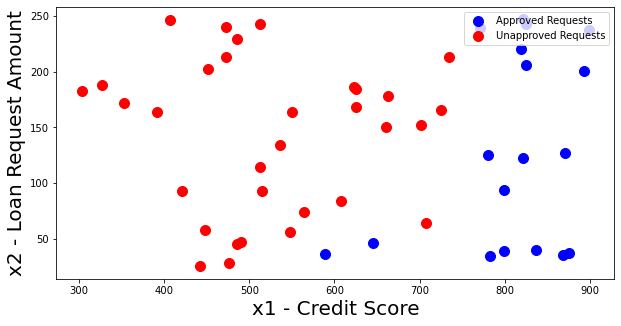

In [3]:
approved_mask = loans_df["Approval"] == 1

plt.figure(figsize=(10,5))
plt.scatter(loans_df["Credit Score"][approved_mask], 
            loans_df["Loan Request Amount"][approved_mask], 
            c = "blue",
            s=100,
            label="Approved Requests")
plt.scatter(loans_df["Credit Score"][~approved_mask], 
            loans_df["Loan Request Amount"][~approved_mask], 
            c = "red",
            s=100,
            label="Unapproved Requests")
plt.legend(loc="upper right")
plt.xlabel("x1 - Credit Score", fontsize="20")
plt.ylabel("x2 - Loan Request Amount", fontsize="20")
plt.show();

Looking at these points plotted, we can probably estimate where a logisitic regression model would draw a separation. However, we can also see that we would not always need a logistic regression model to help us estimate what kind of response a given credit request would provide.

Consider the following new point in the plot below: Do you think this request would get approved or denied?

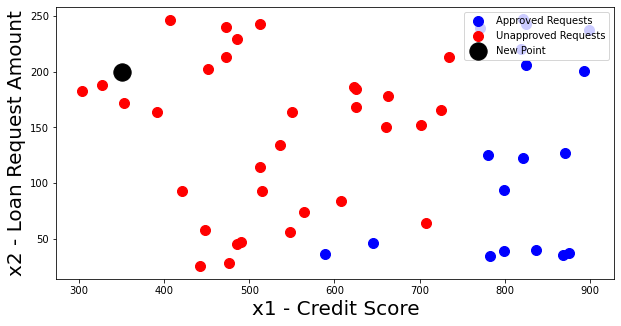

In [4]:
approved_mask = loans_df["Approval"] == 1

plt.figure(figsize=(10,5))
plt.scatter(loans_df["Credit Score"][approved_mask], 
            loans_df["Loan Request Amount"][approved_mask], 
            c = "blue",
            s=100,
            label="Approved Requests")
plt.scatter(loans_df["Credit Score"][~approved_mask], 
            loans_df["Loan Request Amount"][~approved_mask], 
            c = "red",
            s=100,
            label="Unapproved Requests")
plt.scatter([350], [200], c="black", s=300, marker="o", label="New Point")
plt.legend(loc="upper right")
plt.xlabel("x1 - Credit Score", fontsize="20")
plt.ylabel("x2 - Loan Request Amount", fontsize="20")
plt.show();

What about the one below?

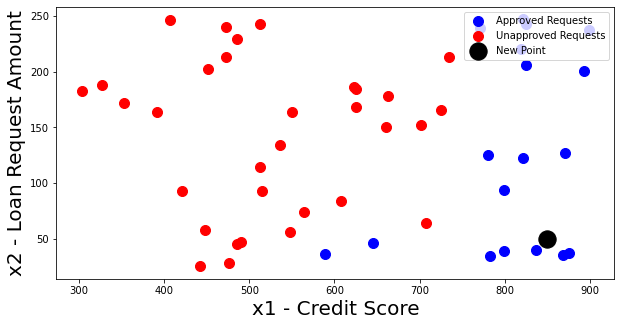

In [5]:
approved_mask = loans_df["Approval"] == 1

plt.figure(figsize=(10,5))
plt.scatter(loans_df["Credit Score"][approved_mask], 
            loans_df["Loan Request Amount"][approved_mask], 
            c = "blue",
            s=100,
            label="Approved Requests")
plt.scatter(loans_df["Credit Score"][~approved_mask], 
            loans_df["Loan Request Amount"][~approved_mask], 
            c = "red",
            s=100,
            label="Unapproved Requests")
plt.scatter([850], [50], c="black", s=300, marker="o", label="New Point")
plt.legend(loc="upper right")
plt.xlabel("x1 - Credit Score", fontsize="20")
plt.ylabel("x2 - Loan Request Amount", fontsize="20")
plt.show();

We have an intuitive notion of other points of the same type being "close" to it, and we base our estimate on those points. This behaviour is seen in machine learning models such as K-Nearest Neighbour classifiers (not covered in this lecture). But for now, let's consider two limitations to the visual method:

1. Our data is 2-Dimensional, which makes the comparison easy. If our data contained many points and were 3-Dimensional, or higher, we would have a hard time.
2. The points chosen were easy to classify, to deal with points along the border with this method, we need a more objective definition of distance.

It turns out, we have several definitions of distance between points that are employed in different scenarios.

### Distance Metrics

We will be exploring four different distance metrics:

1. Euclidean Distance
2. Manhattan Distance
3. Cosine Similarity
4. Levenshtein distance

---

#### Exercise 1

1. Get into 4 groups (one for each distance metric) and spend some time exploring the distance metric assigned by your instructor. 
2. Present an explanation of the distance metric you've been assigned back to the class.

---

### 1. Euclidean Distance

This is often what we mean we say "distance." The shortest distance between point $a$ and point $b$. The formula for the Euclidean distance (named after [Euclid](https://en.wikipedia.org/wiki/Euclid)) is defined as:

$$d(a, b) = \sqrt{(b_1 - a_1)^2+(b_2 - a_2)^2+...+(b_n - a_n)^2}$$

where $n$ is the number of dimensions our points have. In our previous example, each point had 2 dimensions, so the formula would be

$$d(a, b) = \sqrt{(b_{credit\_score} - a_{credit\_score})^2 + (b_{loan\_request\_amount} - a_{loan\_request\_amount})^2}$$

Euclidean distance is a very convenient and intuitive measure of distance between points, and is by far the one used most often. It is also sometimes called "$L2$ norm"

--- 

#### Exercise 2

1. Given a new point: `Credit Score` = 300 and `Loan Request Amount` = 100, what is the closest point to it? What is the closest point's class? Use the Euclidean distance as a distance measure.

------------

While Euclidean distance is by far the most widely used distance measure, it is not the only one. 

### 2. Manhattan Distance

Manhattan distance is similar to Euclidean distance, but it does not employ the squaring or square root of the differences. It is simply the absolute value of all differences summed.

Mathematically it looks like this:

$$d(a,b) = |a_1 - b_1| + |a_2 - b_2| + ... + |a_n - b_n|$$

and for our example it would look like this:

$$d(a, b) = |a_{credit\_score} - b_{credit\_score}| + |a_{loan\_request\_amount} - b_{loan\_request\_amount}|$$


This seems like an odd distance at first, but consider the following scenario:
![L1Distance](https://drive.google.com/uc?export=view&id=1LJkP0Rc3r4kAtr7GPpZYNQ2UcXOPZNZu)<br>
<center> <i> Image taken from https://medium.com/@paubric/the-square-circle-exploiting-distance-cef434f7f550 </i> 
</center> 

Let's say you're in position "Start" and want to get to position "End". True enough, the shortest distance between Start and End is the Euclidean distance (pink). However, unless you are Spiderman, you cannot take advantage of that distance. You have to take advantage of the grid-like structure of city streets and travel the Manhattan distance (blue). The Manhattan distance is sometimes referred to as the "L1 distance" or "L1 norm".

Both L2 and L1 are distances between points, and are specific cases of what is called [Minkowski Distance](https://en.wikipedia.org/wiki/Minkowski_distance). Given two points $p$ and $q$, both Manhattan and Euclidean distance help us answer the question "How close is $p$ to $q$?"

However, other distance metrics exist to answer different questions about point. One of these is the Cosine Similarity.

### 3. Points as Vectors and Cosine Similarity

Before we can talk about the cosine similarity, we need to take a step back and talk about points, vectors, and the dot product.

First, consider the case of 3 points in a two dimensional space:

In [6]:
p = (0.5, 0.5)
q = (2.0, 2.4)
r = (-0.3, -0.3)

Let's plot them in space, and let's also plot the point $O = (0.0, 0.0)$.

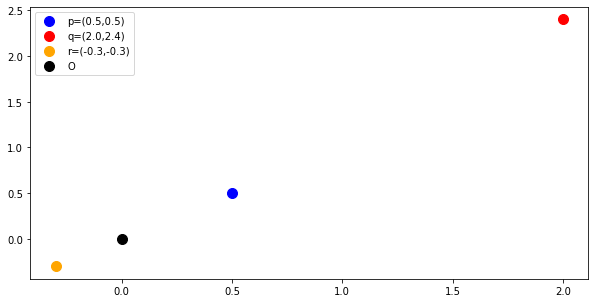

In [7]:
x = [p[0], q[0], r[0]]
y = [p[1], q[1], r[1]]

plt.figure(figsize=(10,5))
plt.scatter(p[0], p[1], c = "blue", s=100, label=f'p=({p[0]},{p[1]})')
plt.scatter(q[0], q[1], c = "red", s=100, label=f'q=({q[0]},{q[1]})')
plt.scatter(r[0], r[1], c = "orange",s=100, label=f'r=({r[0]},{r[1]})')
plt.scatter(0.0, 0.0, c = "black",s=100, label="O")
plt.legend()
plt.show();

It's very clear point $p$ is closer to point $r$ than it is to point $p$. However, what if we are not interested in the points themselves, but in the vectors they represent.

When we describe vectors we usually refer to an object that has a quantity and a direction (e.g. speed, distance traveled). Every point $p = (p_1, p_2, ..., p_n)$ can be considered as a vector from the origin to that point as shown in the plot below:

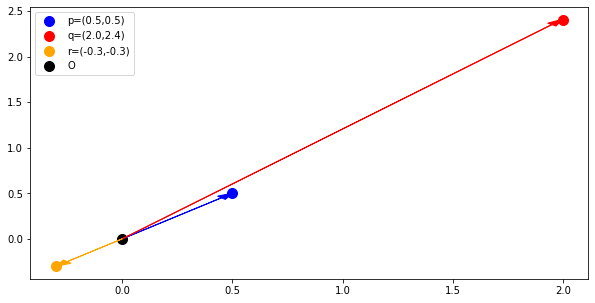

In [8]:
x = [p[0], q[0], r[0]]
y = [p[1], q[1], r[1]]

plt.figure(figsize=(10,5))
plt.scatter(p[0], p[1], c = "blue", s=100, label=f'p=({p[0]},{p[1]})')
plt.scatter(q[0], q[1], c = "red", s=100, label=f'q=({q[0]},{q[1]})')
plt.scatter(r[0], r[1], c = "orange",s=100, label=f'r=({r[0]},{r[1]})')
plt.scatter(0.0, 0.0, c = "black",s=100, label="O")
plt.arrow(0.0, 0.0, p[0]-0.05, p[1]-0.05, head_width=0.05, color="blue")
plt.arrow(0.0, 0.0, q[0]-0.05, q[1]-0.05, head_width=0.05, color="red")
plt.arrow(0.0, 0.0, r[0]+0.05, r[1]+0.05, head_width=0.05, color="orange")
plt.legend()
plt.show();

Instead of looking at the distance between the endpoints of the vectors, we can ask "What is the angle between the red and blue vectors (vector $p$ and vector $q$)?" or "Does vector $p$ point in a more similar direction to vector $q$ or vector $r$?"

To answer these questions, we employ the cosine similarity. The **cosine similarity of $p$ and $q$** is defined as the cosine of the angle $\alpha$ between $p$ and $q$:


$$
\begin{align}
\text{similarity}(p,q) & = cos(\alpha)
\end{align}
$$

 This formula gives a value between $-1$ and $1$.

   - A value of -1 means the vectors are pointing in opposite directions as $\cos(180^\circ) = \cos(-180^\circ) = -1$.
   
   - A value of 0 means the vectors are orthogonal (right angles) from each other as $\cos(90^\circ) = \cos(-90^\circ) = 0$.
   
   - A value of 1 means the vectors are pointing in the same direction as $\cos(0^\circ)= \cos(360^\circ) = 1$. 

There is a very efficient way of calculating this value using the **dot** product and length of the vectors.

#### The Dot Product

The dot product between two vectors is a sum of their element-wise product. Simply put, if we have two vectors $p$ and $q$ their dot product is:

$$p \cdot q = (p_1 \times q_1) + (p_2 \times q_2) + ... + (p_n \times q_n)$$

In our case the dot product between vectors $p$ and $q$ is:

$$p \cdot q = (0.5 \times 2.0) + (0.5 \times 2.4) = 2.2$$

#### The Length of the Vector

Calculating the length of the vector is fairly simple: it's simply the L2 norm of the vector itself.

$$|p| = \sqrt{p_1^2 + p_2^2 + ... + p_n^2}$$

For our vector $p$ it would be:

$$|p| = \sqrt{0.5^2 + 0.5^2} \approx 0.707$$

#### The Cosine Similarity and Cosine Distance

Now that we know the dot product and the length of the vector we can calculate the cosine similarity between two vectors as follows:

$$\text{similarity}(p,q) = cos(\alpha) = \frac{p \cdot q}{|p|\times |q|}$$

To make this measure act more like a standard distance metric, where a larger number indicates more 'distant' vectors,  many implementations will calculate a *cosine distance* as:

$$\text{cosine distance} = 1 - \text{cosine similarity}$$

Using this cosine distance metric, the smaller the value, the more the two vectors point in the same direction down to a minimum distance of 0. The larger the value, the more they point in opposite directions, up to a max of 2. 


It may not be immediately obvious why this measure is important, but consider a collection of ratings for products as an example of three 5-dimensional vectors. 

In [9]:
ratings_person1 = [3,3,3,5,5]
ratings_person2 = [1,1,1,3,3]
ratings_person3 = [4,4,3,2,3]

In [10]:
ratings_df = pd.DataFrame([ratings_person1,ratings_person2,ratings_person3],
                          columns=[f"item {i}" for i in range(1,6)])
ratings_df

,item 1,item 2,item 3,item 4,item 5
0,3,3,3,5,5
1,1,1,1,3,3
2,4,4,3,2,3




While the reviews of Person 1 and 2 are different numerically, they seem to value the same items, preferring the first three over the last two. Person 1 and Person 3 gave close review scores but the overall sentiment is clearly different: Person 3 prefers the first two items over the last three.

Let's see which metric detects this better:

In [11]:
def euclidean_distance(a, b):
    the_sum = 0.0
    for i in range(len(a)):
        the_sum += (a[i] - b[i])**2
        
    return math.sqrt(the_sum)

In [12]:
def cosine_distance(a,b):
    numerator = 0.0
    for i in range(len(a)):
        numerator += a[i]*b[i]
        
    len_a = 0.0
    for i in range(len(a)):
        len_a += a[i]**2
    len_a = math.sqrt(len_a)
    
    len_b = 0.0
    for i in range(len(b)):
        len_b += b[i]**2
    len_b = math.sqrt(len_b)
    
    cosine_similarity = numerator/(len_a*len_b)
    
    return 1 - cosine_similarity
    

Let's compare how all people relate using the cosine distance.

In [13]:
print(f'Cosine distance between person 1 and person 2 is {cosine_distance(ratings_person1, ratings_person2)}')
print(f'Cosine distance between person 1 and person 3 is {cosine_distance(ratings_person1, ratings_person3)}')
print(f'Cosine distance between person 2 and person 3 is {cosine_distance(ratings_person2, ratings_person3)}')

Cosine distance between person 1 and person 2 is 0.030138773961112086
Cosine distance between person 1 and person 3 is 0.10053192994814486
Cosine distance between person 2 and person 3 is 0.22791196780855172


And the Euclidean distance.

In [14]:
print(f'Euclidean distance between person 1 and person 2 is {euclidean_distance(ratings_person1, ratings_person2)}')
print(f'Euclidean distance between person 1 and person 3 is {euclidean_distance(ratings_person1, ratings_person3)}')
print(f'Euclidean distance between person 2 and person 3 is {euclidean_distance(ratings_person2, ratings_person3)}')

Euclidean distance between person 1 and person 2 is 4.47213595499958
Euclidean distance between person 1 and person 3 is 3.872983346207417
Euclidean distance between person 2 and person 3 is 4.795831523312719


While the cosine distance between Person 1 and Person 2 is the smallest, the smallest Euclidean distance is in fact between Person 1 and Person 3. Often times, we use the cosine distance to compare these kind of similarities in trend rather than distance between the points.

So far we've been discussing distance between points in space, or between vectors. However, all of these measures are applied to numeric values.

Consider trying to find the distance between words such as "cat" and "hat", or more complex strings. The need for distance between strings or sequences of characters comes up in several applications, most notable of which is genetics where the "distance" between genetic material from different sources needs to be quantified.

### 4. Levenshtein Distance

The Levenshtein distance is one distance measure which quantifies the number of steps required to get from one string to another string.

Some simple examples are quite easy to quantify:<br>
The distance from **cat** to **hat** is 1 (replace "c" with "h")<br>
The distance from **cat** to **car** is also 1 (replace "t" with "r")<br>
The distance from **cat** to **can't** is 2 (insert "n'" between "a" and "t")<br>

What about the distance from "encyclopedia" to "cyclops"?<br>
What about the more practical case of the distance from a mouse genome to a rat genome? What if we wanted to find out, from a genetic standpoint, the distance between dolphins and sharks, dolphins and people, and sharks and people?

The mathematical definition for the Levenshtein distance between strings $a$ and $b$ up to positions $i$ and $j$, respectively can be denoted as $lev(a,b,i,j)$. It can be expressed as:

 $$ lev(a,b,i,j)=   \left\{
\begin{array}{ll}
      max(i,j) & \text{if i=0 or j=0} \\
      min \left\{
      \begin{array}{ll}
      lev(a,b,i-1, j) & +1 \\
      lev(a,b,i,j-1) & +1 \\
      lev(a,b,i-1,j-1) & + I(a[i-1]\ne b[j-1]) \\
      \end{array} 
      \right. & otherwise
\end{array} 
\right.  $$

You will notice the definition is recursive at its core. To implement this in code we would define the following function:

In [15]:
def levenshtein_distance(a,b, i=None, j=None):
    if (i is None):
        i = len(a)
    if (j is None):
        j = len(b)
        
    if (i == 0) or (j == 0):
        return_value = max(i, j)
    else:
        score1 = levenshtein_distance(a, b, i - 1, j) + 1
        score2 = levenshtein_distance(a, b, i, j - 1) + 1      
        score3 = levenshtein_distance(a, b, i - 1, j - 1) + (a[i - 1] != b[j - 1]) # a!=b is 1 if it is true 
                                                                         # and 0 if it is false
        return_value = min(score1, score2, score3)
    
    return return_value

In [16]:
levenshtein_distance("cat", "hat")

1

In [17]:
levenshtein_distance("cat", "car")

1

In [18]:
levenshtein_distance("cat", "can't")

2

In [19]:
# Notice this takes a while even though the words are not very long
levenshtein_distance("encyclopedia", "cyclops")

6

In [20]:
# This will take a very long time
#levenshtein_distance("encyclopedia", "cyclopamine")

You will notice the Levenshtein distance metric implementation shown here here is fairly slow. Faster implementation use [Dynamic Programming](https://en.wikipedia.org/wiki/Dynamic_programming). There are other text-based distance metrics available, but they all answer the same basic question, "How many operations does it take to transform one string into another?"

Most metrics we covered here are available in `sklearn` via the [sklearn.metrics.DistanceMetric](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html) class. Though currently `sklearn` does not support string based distances (a good implementation of Levenshtein distance is available [here](https://stackabuse.com/levenshtein-distance-and-text-similarity-in-python/)).

Distance measures are important for many algorithms, but looking at distance in high-dimensional space has a fundamental weakness which we explore next, as well as its solution.

## Scaling Data

Let's consider our loans dataset from before.

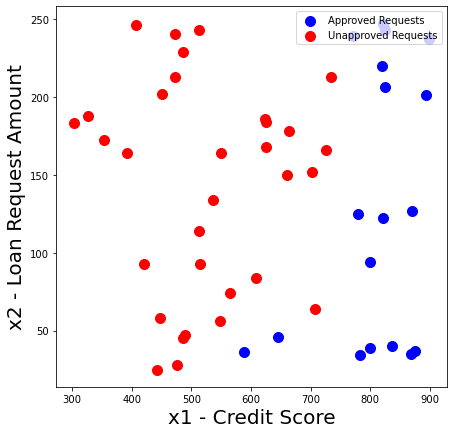

In [21]:
approved_mask = loans_df["Approval"] == 1

plt.figure(figsize=(7,7))
plt.scatter(loans_df["Credit Score"][approved_mask], 
            loans_df["Loan Request Amount"][approved_mask], 
            c = "blue",
            s=100,
            label="Approved Requests")
plt.scatter(loans_df["Credit Score"][~approved_mask], 
            loans_df["Loan Request Amount"][~approved_mask], 
            c = "red",
            s=100,
            label="Unapproved Requests")
plt.legend(loc="upper right")
plt.xlabel("x1 - Credit Score", fontsize="20")
plt.ylabel("x2 - Loan Request Amount", fontsize="20")
plt.show();

Look at the $x_1$ and $x_2$ axes; they are on a slightly different scale. If we plotted both values on a scale of 0 to 1200 we would see the following:

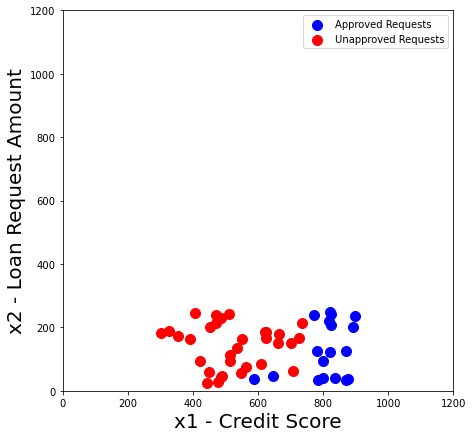

In [22]:
approved_mask = loans_df["Approval"] == 1

plt.figure(figsize=(7,7))
plt.scatter(loans_df["Credit Score"][approved_mask], 
            loans_df["Loan Request Amount"][approved_mask], 
            c = "blue",
            s=100,
            label="Approved Requests")
plt.scatter(loans_df["Credit Score"][~approved_mask], 
            loans_df["Loan Request Amount"][~approved_mask], 
            c = "red",
            s=100,
            label="Unapproved Requests")
plt.legend(loc="upper right")
plt.xlim(0, 1200)
plt.ylim(0, 1200)
plt.xlabel("x1 - Credit Score", fontsize="20")
plt.ylabel("x2 - Loan Request Amount", fontsize="20")
plt.show();

You notice the data is much wider than it is tall. In fact, looking at it this way, we see that the different "areas" for each class are almost entirely determined by the $x_1$ value.

Let's look at a worse example from the `sklearn` wine dataset available.

In [23]:
from sklearn.datasets import load_wine

wine = load_wine()

X = wine.data
y = wine.target

Let's try and visualize the data using only the 2nd column and last column (The Malic Acid % and Proline concentration).

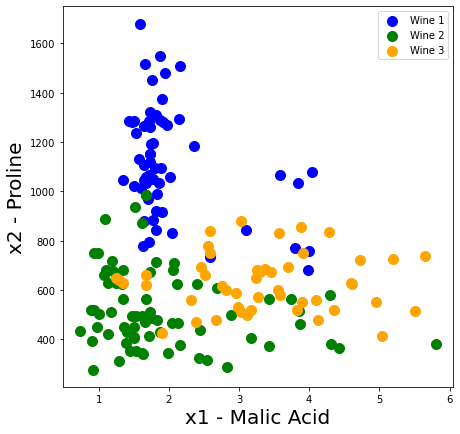

In [24]:
wine_1_mask = y==0
wine_2_mask = y==1
wine_3_mask = y==2


plot_X = X[:, [1, -1]]

plt.figure(figsize=(7,7))
plt.scatter(plot_X[wine_1_mask][:, 0], 
            plot_X[wine_1_mask][:, 1], 
            c = "blue",
            s=100,
            label="Wine 1")
plt.scatter(plot_X[wine_2_mask][:, 0], 
            plot_X[wine_2_mask][:, 1], 
            c = "green",
            s=100,
            label="Wine 2")
plt.scatter(plot_X[wine_3_mask][:, 0], 
            plot_X[wine_3_mask][:, 1], 
            c = "orange",
            s=100,
            label="Wine 3")
plt.legend(loc="upper right")
plt.xlabel("x1 - Malic Acid", fontsize="20")
plt.ylabel("x2 - Proline", fontsize="20")
plt.show();

Distinguishing the three wine types can be difficult here based on distance, but more importantly, notice the scales again. If we plotted both values on the same scale (-100 to 1600)

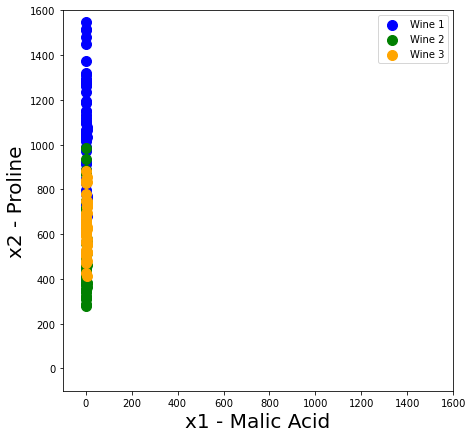

In [25]:
wine_1_mask = y==0
wine_2_mask = y==1
wine_3_mask = y==2

plot_X = X[:, [1, -1]]

plt.figure(figsize=(7,7))
plt.scatter(plot_X[wine_1_mask][:, 0], 
            plot_X[wine_1_mask][:, 1], 
            c = "blue",
            s=100,
            label="Wine 1")
plt.scatter(plot_X[wine_2_mask][:, 0], 
            plot_X[wine_2_mask][:, 1], 
            c = "green",
            s=100,
            label="Wine 2")
plt.scatter(plot_X[wine_3_mask][:, 0], 
            plot_X[wine_3_mask][:, 1], 
            c = "orange",
            s=100,
            label="Wine 3")
plt.legend(loc="upper right")
plt.xlim(-100, 1600)
plt.ylim(-100, 1600)
plt.xlabel("x1 - Malic Acid", fontsize="20")
plt.ylabel("x2 - Proline", fontsize="20")
plt.show();

This is terrible!

When looking at this in the same scale the data is entirely dominated by the proline concentration!

`matplotlib` is smart enough, when we ask it to plot, to draw the data in different scales. However, some machine learning techniques will be stumbled by this issue.

To prepare the data we often scale it using a Scaler. We will look at two types of scalers from `sklearn`:


1. [MinMax Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.html)
2. [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [26]:
import warnings
warnings.filterwarnings("ignore")

### MinMax Scaler

The `MinMaxScaler` scales the data such that each feature, or each dimension, lies exactly between 0 and 1. 


Mathematically, for each feature (or dimension), we find the maximum value $max_f$, and minimum value $min_f$, and then each value in that feature gets transformed by the following formula:

$$x_{new} = \frac{x_{old} - min_f}{max_f - min_f}$$

Let's look at the effect of the scaler on the loans data.

In [27]:
from sklearn.preprocessing import MinMaxScaler # 1. Import the scaler

# 2. make a scaler
my_minmax_scaler = MinMaxScaler()

# 3. fit the scaler
my_minmax_scaler.fit(loans_df[["Credit Score", "Loan Request Amount"]])

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_loans_data = my_minmax_scaler.transform(loans_df[["Credit Score", "Loan Request Amount"]])


scaled_loans_df = pd.DataFrame(columns=["Credit Score", "Loan Request Amount"], data=scaled_loans_data)
scaled_loans_df.head()

,Credit Score,Loan Request Amount
0,0.411074,0.139640
1,0.540268,0.644144
2,1.000000,0.954955
3,0.511745,0.265766
4,0.805369,0.040541


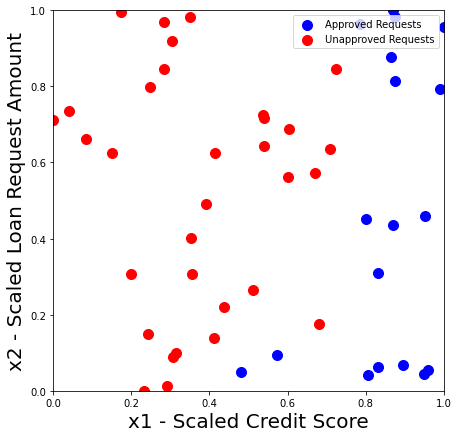

In [28]:
approved_mask = loans_df["Approval"] == 1

plt.figure(figsize=(7,7))
plt.scatter(scaled_loans_df["Credit Score"][approved_mask], 
            scaled_loans_df["Loan Request Amount"][approved_mask], 
            c = "blue",
            s=100,
            label="Approved Requests")
plt.scatter(scaled_loans_df["Credit Score"][~approved_mask], 
            scaled_loans_df["Loan Request Amount"][~approved_mask], 
            c = "red",
            s=100,
            label="Unapproved Requests")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.legend(loc="upper right")
plt.xlabel("x1 - Scaled Credit Score", fontsize="20")
plt.ylabel("x2 - Scaled Loan Request Amount", fontsize="20")
plt.show();

Notice the scales on both $x_1$ and $x_2$ is the same, it is 0.0 to 1.0. The downside is that we've lost the absolute values of the data, but now looking at distances, both features contribute equally.

### Standard Scaler

In practice, people use the Standard scaler rather than the MinMax scaler. While the ,MinMax scaler scales the data such that it lies between 0 and 1, the standard scaler scales the data such that it is centered at 0, and has a variance (as well as standard deviation) of 1.0

Mathematically, for each feature (or dimension), we find the mean/average value $\mu_f$, and standard deviation $\sigma_f$, and then each value in that feature gets transformed by the following formula:

$$x_{new} = \frac{x_{old} - \mu_f}{\sigma_f}$$


Let's look at the scaler in action:

In [29]:
from sklearn.preprocessing import StandardScaler # 1. Import the scaler

# 2. make a scaler
my_standard_scaler = StandardScaler()

# 3. fit the scaler
my_standard_scaler.fit(loans_df[["Credit Score", "Loan Request Amount"]])

# 4. transform the data. Notice we get back a numpy array even if we put in a dataframe
scaled_loans_data = my_standard_scaler.transform(loans_df[["Credit Score", "Loan Request Amount"]])


scaled_loans_df2 = pd.DataFrame(columns=["Credit Score", "Loan Request Amount"], data=scaled_loans_data)
scaled_loans_df2.head()

,Credit Score,Loan Request Amount
0,-0.468109,-1.102474
1,-0.013003,0.409244
2,1.606464,1.340570
3,-0.113481,-0.724545
4,0.920850,-1.399419


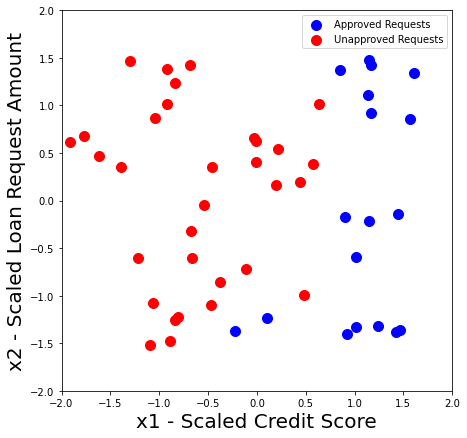

In [30]:
approved_mask = loans_df["Approval"] == 1

plt.figure(figsize=(7,7))
plt.scatter(scaled_loans_df2["Credit Score"][approved_mask], 
            scaled_loans_df2["Loan Request Amount"][approved_mask], 
            c = "blue",
            s=100,
            label="Approved Requests")
plt.scatter(scaled_loans_df2["Credit Score"][~approved_mask], 
            scaled_loans_df2["Loan Request Amount"][~approved_mask], 
            c = "red",
            s=100,
            label="Unapproved Requests")
plt.xlim(-2.0, 2.0)
plt.ylim(-2.0, 2.0)
plt.legend(loc="upper right")
plt.xlabel("x1 - Scaled Credit Score", fontsize="20")
plt.ylabel("x2 - Scaled Loan Request Amount", fontsize="20")
plt.show();

Notice the scale of the data is similar, but not identical ($x_1$ extends from -2.0 to 1.5, while $x_2$ extends from -1.5 to 1.5). Notice also the data is centered around the point (0,0). 

In practice, the standard scaler has a better performance on many machine learning models. However, the `MinMaxScaler` would have better run-time performance.

Scaling usually removes any skew in the data as well by centering it. Consider the following example where the original data is colored in blue, and the scaled data in orange:

![dataUnskewed](https://drive.google.com/uc?export=view&id=1lVdIoetld03P9GqMPrQLjkp5XFj0Izuc)

and scaling does not just squish the data, it can also expand it outwards:


![dataStretched](https://drive.google.com/uc?export=view&id=1Ed85zYnx1fOKiBqAhzcY6olk8JyN3CtJ)

## Scaling and Train/Test Split

When we use scalers, we want to be careful with how we employ them. It might be more convenient to first scale and then perform a train/test split, but that methodology would have two flaws in it:

* You would inevitably inject information about your test data into your train data (since they are scaled at the same time)
* What if your real-life data, after the model is deployed, comes in one point at a time? would you re-attach it to the test data, rescale, and retrain your model?

The correct order of operations is:

------------

1. Train-Test Split
2. Pre-process 
    1. Fit scaler on train data
    2. Transform train data
    3. Transform test data using the same scaler
3. Train model on scaled train data
4. Test model on scaled test data

------------

This ensures you'll end up with an unbiased estimate of your model using the test set AND you now have a scaler which you can re-use on every data point as it comes in.

### Scale and Regularization

Regressions, logistic and linear, are somewhat immune to changes in data scale. If the range of values for some feature is shrunk down then a model can compensate by having smaller weights, in this case performance will not be impacted. But this is not always the case.

Let's actually look at an example where scale impacts the accuracy of our models. Recall in regularization we penalize models which learn to use heavy weight parameters. If the weights we learn in regression must be adjusted for data scale then this can have an impact on model performance.

First let's load up two (slightly modified) dimensions of the cancer dataset:

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target


x = np.stack([x[:,0], x[:,14]],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=1)

Let's fit a logistic regression to the data:

In [32]:
from sklearn.linear_model import LogisticRegression

my_logreg_model = LogisticRegression(C=0.1, random_state=1).fit(X_train, y_train)

Now let's do the same, but first we scale the data:

In [33]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

x = np.stack([x[:,0], x[:,14]],axis=1)

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

my_logreg_model_scaled = LogisticRegression(C=0.1, random_state=1).fit(X_scaled_train, y_train)

In [34]:
print(my_logreg_model.score(X_test,y_test))
print(my_logreg_model_scaled.score(X_scaled_test,y_test))

0.8666666666666667
0.8807017543859649


The model fitted to the scaled data did better. Because of the wide range of values in the unscaled data our regularization really had an impact on the model fitting!

---
#### Exercise 3

In many retail scenarios, we model sales as a response of other factors, like price, rain, holidays, competitor sales, etc. However, its not always the case that sales is linearly related to these factors. Let's investigate what happens when we try to fit a linear model to data that does not have linear relationships. 

For this exercise please use OLS from StatsModel.

Use the data from [here.](https://drive.google.com/file/d/1AR21EACLjQ8iDsBWrAFauS-5bO_0aA4J/view?usp=sharing )

1. Plot the data on a linear scale - how does sales total vary with price?
2. Carry out a linear regression on the untransformed data - what can we conclude from the analysis?
3. Check the model residuals of the linear regression. Are they normal and homoscedastic? 
4. Take the log of the sales data and plot log(sales) and price. 
5. Carry out a linear regression on the price and transformed sales data and check the residuals? How do these compare to the residuals of your initial model?
6. How would you interpret the coefficients for this model?

---

Below we demonstrate how an exponential relationship can be transformed into a linear representation by taking the log of the dependant variable.

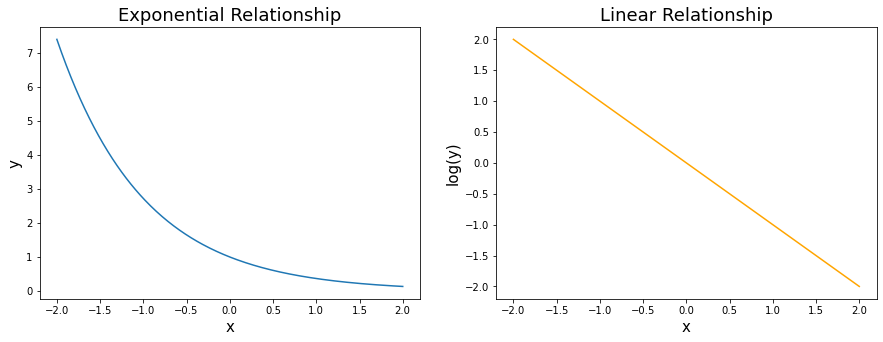

In [35]:
x = np.linspace(-2.0, 2.0, num=300)
y = np.exp(-x) # y is an exponential function of x

plt.subplots(1, 2, figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y) #If we simply plot out y as a function of x we get an exponential curve
plt.title('Exponential Relationship', fontsize=18)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15) 

plt.subplot(1, 2, 2)
plt.plot(x, np.log(y), c='orange') #If we take the log of y, we then transform the exponential relationship into a linear relationship
plt.title('Linear Relationship', fontsize=18)
plt.xlabel('x', fontsize=15)
plt.ylabel('log(y)', fontsize=15)

plt.show()

### Transformations 

We saw how applying a transformation to our data can help fix issues we may have with non-normal and heteroscedastic residuals. Modelling using variables that do not have linear relationships with the dependent is one of the main causes of heteroscedasticity.

Transforming data is a very deep topic area and we will be covering more robust techniques later in the course. The main gist behind transformations is to apply some form of mathematical function to all values in a variable to yield a *transformed* variable. There is a wide range of popular functions commonly applied when modelling data that have been shown to empircally improve model performance. It is not always clear which transformation is best. In Exercise 3, it was quite clear that the relationship was exponential. In many cases this may not be the case so we may need to try a range of transformations and compare results.

**What about interpretability?**

The major downside to transforming variables is the impact on interpretability. We no longer can say a unit increase in price leads to a $\beta_i$ increase in sales. Instead we have to say a unit increase in price leads to a $\beta_i$ increase in $log(sales)$. This is far less intuitive than standard linear regression interpretation. We would then need to take the reverse transformation to get our actual $\hat{y}$. 

**Example from Exercise 3:**

**Step 1** : Original regression equation

$$ y = \beta_0 + \beta_1 x_1 $$ </inline>

**Step 2**: Regression equation after taking the log of sales

$$ log(y) = \beta_0 + \beta_1 x_1 $$

**Step 3**: Take the inverse of the log function to  get the actual value of our sales prediction $\hat{y}$.

$$ \hat{y} = e^{(\beta_0 + \beta_1 x_1)} $$

#### Practical implementation:

- Plotting scatterplots of your independent variables against the dependent variable will help you visually identify whether there is a non-linear relationship. It may also help you work out which transformation to apply.

---

### Other Useful Transformations


The following table summarizes the most common transformations that are applied before regression modelling - keep in mind that the aim is to create a linear relationship between the transformed dependent and independent variables.

|    &nbsp; &nbsp; &nbsp; &nbsp;                 | Transformation &nbsp; &nbsp; &nbsp;         | New Equation &nbsp; &nbsp; &nbsp;  | Inverse-transformed Equation  &nbsp; &nbsp; &nbsp; |
|----------------------------|-------------------------|-----------------------|------------------------|
| No transformation |                     | $$ y = \beta_0 + \beta_1 x $$        | $$ \hat{y} = \beta_0 + \beta_1 x $$|
| Root transformation            | $$ \sqrt{y} $$            | $$ \sqrt{y} = \beta_0 + \beta_1 x $$    | $$ \hat{y} = {(\beta_0 + \beta_1 x)}^2 $$       |
| Reciprocal tranformation           | $$ \frac{1}{y} $$               | $$ \frac{1}{y} = \beta_0 + \beta_1 x $$         | $$ \hat{y} = \frac{1}{\beta_0 + \beta_1 x} $$  |
| Log transformations          | $$ log(y) $$             | $$ log(y) = \beta_0 + \beta_1 x $$     | $$ \hat{y} = e^{(\beta_0 + \beta_1 x)} $$      |
|           | $$ log(x)$$             | $$ y = \beta_0 + \beta_1 log(x) $$     | $$ \hat{y} = \beta_0 + \beta_1 log(x) $$      |
| Log-log regression                | $log(y)$ and $log(x)$ | $$ log(y) = \beta_0 + \beta_1 log(x) $$ | $$ \hat{y} = e^{\beta_0}x^{\beta_1} $$ |

The last column shows how one can express the original response $y$ based on the transformed equation - this helps to understand how a unit change in $x$ will affect the original dependent variable $y$. For a given data set, in order to find the best transformation, one can inspect the residual plots and correlation coefficients.

### So which scaler should I use?

Generally, people use standard scaler unless there is a physical limitation to using that (such as a very large dataset). You should start with the standard scaler and consider changing to min-max scaler if the run time is too long. 

Realistically the choice of which scaler to use will have negligible effect compared to using a scaler versus not using a scaler.

### ... and which distance metric?

Most algorithms use Euclidean distance or Cosine similarity, and the default usually works quite well. However you should be aware that distance is not a fixed notion and that sometimes a custom method of measuring distance is required.

<div id="container" style="position:relative;">
<div style="position:relative; float:right"><img style="height:25px""width: 50px" src ="https://drive.google.com/uc?export=view&id=14VoXUJftgptWtdNhtNYVm6cjVmEWpki1" />
</div>
</div>
